In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Breast Cancer METABRIC.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

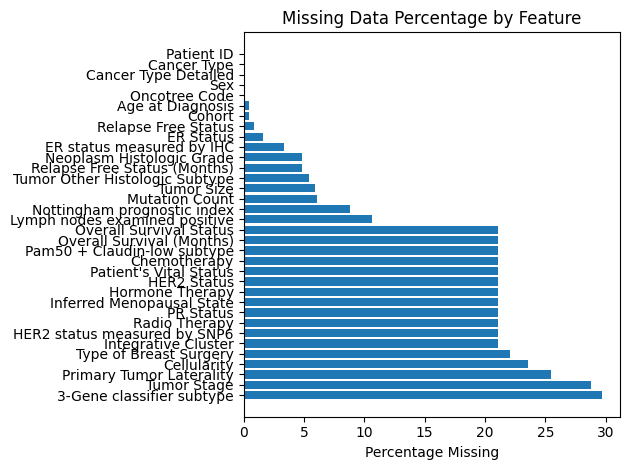

In [6]:
import matplotlib.pyplot as plt

missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)

plt.figure()
plt.barh(missing_pct.index, missing_pct.values)
plt.xlabel("Percentage Missing")
plt.title("Missing Data Percentage by Feature")
plt.tight_layout()
plt.show()


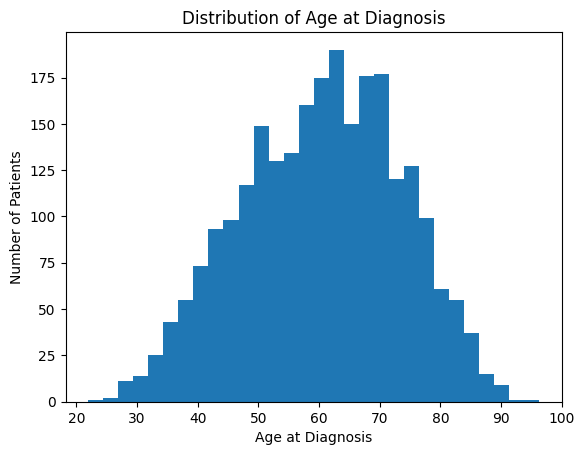

In [8]:
#Age at Diagnosis distribution
plt.figure()
plt.hist(df["Age at Diagnosis"].dropna(), bins=30)
plt.xlabel("Age at Diagnosis")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age at Diagnosis")
plt.show()


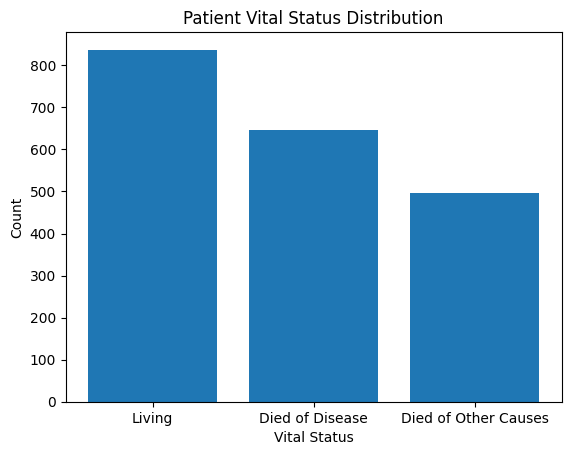

In [10]:
#Vital Status breakdown (target intuition)
status_counts = df["Patient's Vital Status"].value_counts()

plt.figure()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel("Vital Status")
plt.ylabel("Count")
plt.title("Patient Vital Status Distribution")
plt.show()


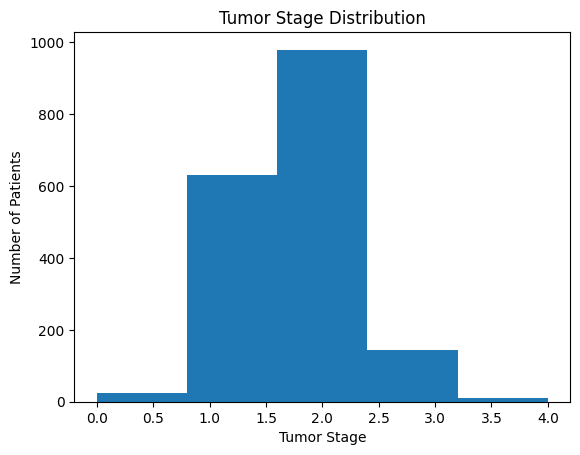

In [11]:
#Tumor Stage distribution
plt.figure()
plt.hist(df["Tumor Stage"].dropna(), bins=5)
plt.xlabel("Tumor Stage")
plt.ylabel("Number of Patients")
plt.title("Tumor Stage Distribution")
plt.show()


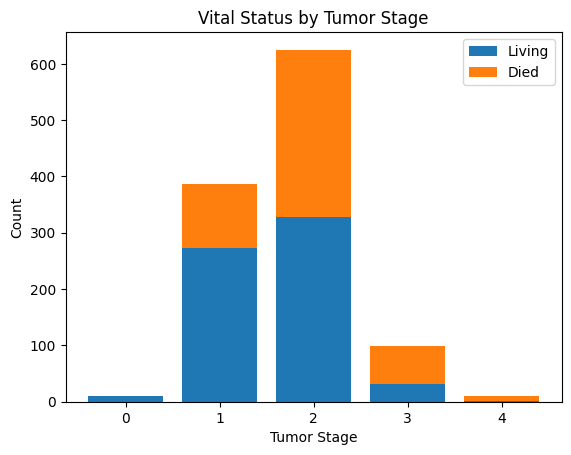

In [12]:
#Tumor Stage vs Vital Status
stages = sorted(df["Tumor Stage"].dropna().unique())

alive_counts = []
dead_counts = []

for s in stages:
    alive_counts.append(
        len(df[(df["Tumor Stage"] == s) & (df["Patient's Vital Status"] == "Living")])
    )
    dead_counts.append(
        len(df[(df["Tumor Stage"] == s) & (df["Patient's Vital Status"] == "Died of Disease")])
    )

plt.figure()
plt.bar(stages, alive_counts, label="Living")
plt.bar(stages, dead_counts, bottom=alive_counts, label="Died")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.title("Vital Status by Tumor Stage")
plt.legend()
plt.show()
